In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/IMDB

/content/drive/MyDrive/IMDB


In [ ]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import seaborn as sns
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import xgboost
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from gensim.parsing.preprocessing import remove_stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers, optimizers, losses
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
detail_df = pd.read_csv('./all_details.csv', sep=',', encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
detail_df.shape

(80698, 21)

In [ ]:
detail_df.isna().sum()

movie id                    0
title                       0
series                  67933
release year            17392
certification           19788
duration                23609
average rating           5947
rating total             5947
popularity score        69995
popularity delta        70022
content                  2833
numOfUserReviews        10977
numOfCriticReviews      23234
metaScore               67381
star_url_list            1093
countries_of_origin      1422
official_sites          44917
languages                2864
filming_locations       32838
production_companies     6147
budget_list             61521
dtype: int64

In [ ]:
def isnan(value):
    try:
        import math
        return math.isnan(float(value))
    except:
        return False

In [ ]:
for i in tqdm(range(len(detail_df))):
  if isnan(detail_df.iloc[i]['certification']):
    continue
  if detail_df.iloc[i]['certification'][0].isnumeric():
    detail_df.at[i, 'release year'] = detail_df.iloc[i]['certification']
    detail_df.at[i, 'certification'] = detail_df.iloc[i]['duration']
    detail_df.at[i, 'duration'] = None

100%|██████████| 80698/80698 [00:20<00:00, 3908.89it/s]


In [ ]:
detail_df

,movie id,title,series,release year,certification,duration,average rating,rating total,popularity score,popularity delta,...,numOfUserReviews,numOfCriticReviews,metaScore,star_url_list,countries_of_origin,official_sites,languages,filming_locations,production_companies,budget_list
0,tt0378947,Melinda and Melinda,NaN,2004,PG-13,1h 39m,6.4,32K,NaN,NaN,...,184,155,54.0,/name/nm0002071/?ref_=tt_ov_st|/name/nm0005416...,United States,Official site,English,"Filming locations|Central Park, Manhattan, New...",Production companies|Fox Searchlight Pictures|...,NaN
1,tt0306047,Scary Movie 3,NaN,2003,PG-13,1h 24m,5.5,147K,"1,525",151,...,384,159,49.0,/name/nm0267506/?ref_=tt_ov_st|/name/nm0000221...,United States|Canada,Official sites|Miramax (United States)|Officia...,English,"Filming locations|Washington, District of Colu...",Production companies|Dimension Films|Brad Grey...,"$48,000,000 (estimated)"
2,tt4183480,Forevermore,NaN,2014–2015,TV-PGTV-PG,None,8.4,280,NaN,NaN,...,NaN,NaN,NaN,/name/nm6628668/?ref_=tt_ov_st|/name/nm4715046...,Philippines,NaN,Filipino,NaN,ABS-CBN,NaN
3,tt10483610,Capitani,TV Series,2019–2022,TV-MA,5h 12m,6.6,4.5K,543,"2,342",...,85,12,NaN,/name/nm5020632/?ref_=tt_ov_st|/name/nm8090479...,Luxembourg,Coproducer's website,Luxembourgish,Filming locations|Luxembourg|,Production companies|Artémis Productions|Film ...,NaN
4,tt9253298,Shaun the Sheep 3D,TV Mini Series,2012,Not Rated,1m,8.1,28,NaN,NaN,...,NaN,NaN,NaN,/name/nm1017994/?ref_=tt_ov_st,United Kingdom,Official site,NaN,NaN,Production company|Aardman Animations|,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80693,tt8847626,Dhund,NaN,2018,NaN,NaN,7.5,9,NaN,NaN,...,NaN,NaN,NaN,/name/nm3192510/?ref_=tt_ov_st|/name/nm1282023...,India,Large Short Winners,Hindi,NaN,Production companies|Fundamental Pictures|Hous...,NaN
80694,tt0025330,Jimmy the Gent,NaN,1934,Passed,1h 7m,6.6,1.9K,NaN,NaN,...,30,12.0,NaN,/name/nm0000010/?ref_=tt_ov_st|/name/nm0000012...,United States,NaN,English,Warner Brothers Burbank Studios - 4000 Warner ...,Production company|Warner Bros.|,NaN
80695,tt0900387,Suite Française,NaN,2014,NaN,NaN,7.0,26K,"4,750",849,...,81,109.0,63.0,/name/nm0931329/?ref_=tt_ov_st|/name/nm0000218...,United Kingdom|France|Canada|Belgium|United St...,Official sites|Official Facebook|Official site...,English|German|French|Latin,"Filming locations|Marville, Meuse, Lorraine, F...",Production companies|Alliance|Qwerty Films|Sco...,"€15,000,000 (estimated)"
80696,tt9098872,The Rescue,NaN,2021,PG,1h 47m,8.3,13K,"3,201",557,...,93,54.0,84.0,/name/nm12943039/?ref_=tt_ov_st|/name/nm129430...,United Kingdom|United States,Official site,Thai|English,Filming locations|Thailand|,Production companies|National Geographic Docum...,NaN


In [ ]:
detail_df['series'] = detail_df['series'].fillna('Others')

In [ ]:
detail_df = detail_df.dropna(subset=['release year'])

In [ ]:
detail_df = detail_df.dropna(subset=['title'])

In [ ]:
detail_df = detail_df.dropna(subset=['star_url_list'])

In [ ]:
detail_df = detail_df.dropna(subset=['languages'])

In [ ]:
detail_df = detail_df.dropna(subset=['countries_of_origin'])

In [ ]:
# detail_df = detail_df.dropna(subset=['official_sites'])

In [ ]:
# detail_df = detail_df.dropna(subset=['production_companies'])

In [ ]:
# detail_df = detail_df.dropna(subset=['budget_list'])

In [ ]:
detail_df['certification'].value_counts()

R            11597
Not Rated     8617
PG-13         4082
TV-14         3418
PG            3411
             ...  
3h 36m           1
7h 20m           1
5h 48m           1
9h 30m           1
8h 40m           1
Name: certification, Length: 362, dtype: int64

In [ ]:
detail_df = detail_df[detail_df['certification'].isin(detail_df['certification'].value_counts().index.tolist()[:14])]

In [ ]:
detail_df = detail_df.dropna(subset=['content'])

In [ ]:
detail_df = detail_df.dropna(subset=['average rating'])

In [ ]:
detail_df = detail_df.dropna(subset=['rating total'])

In [ ]:
detail_df['release year']

0             2004
1             2003
3        2019–2022
6             2006
8             1986
           ...    
80686         2016
80687         1962
80692         1990
80694         1934
80696         2021
Name: release year, Length: 44954, dtype: object

In [ ]:
def release_year_preprocessing(x):
  x = str(x)
  if (x.isnumeric() == False):
    x = x.strip()
  if x[:-1] == '–':
    x = x[:-1]
  elif x.find('–') != -1:
    x = 'period'
  
  if (x == 'period'):
    return 0
  if (int(x) >= 2017):
    return 1
  if (int(x) >= 2012):
    return 2
  if (int (x) >= 2007):
    return 3
  if (int (x) >= 2002):
    return 4
  if (int (x) >= 1997):
    return 5
  if (int (x) >= 1992):
    return 6
  return 7

detail_df['year'] = detail_df['release year'].apply(release_year_preprocessing)


In [ ]:
# def convert_duration_2_num(x):
#   nums = ''
#   for c in x:
#     if c != 'h' and c != 'm':
#       nums +=c
#   nums = nums.split(" ")
#   if len(nums) == 1:
#     return int(nums[0])
#   else:
#     return int(nums[0]) * 60 + int(nums[1])  
# detail_df['movie runtime'] = detail_df['duration'].apply(convert_duration_2_num)

TypeError: ignored

In [ ]:
def cal_num_of_countries(x):
  return len(x.split('|'))
detail_df['num_of_countries'] = detail_df['countries_of_origin'].apply(cal_num_of_countries)
num_of_countries_vector = np.array(detail_df['num_of_countries'])

def cal_num_of_languages(x):
  return len(x.split('|'))
detail_df['num_of_languages'] = detail_df['languages'].apply(cal_num_of_languages)


In [ ]:
full_content = []
content_list = list(detail_df['content'])
title_list = list(detail_df['title'])
for i in range(len(content_list)):
  full_content.append(' '.join([title_list[i], content_list[i]]))

In [ ]:
detail_df['content'] = full_content

In [ ]:
detail_df['content'] 

0        Melinda and Melinda Two alternating stories, o...
1        Scary Movie 3 Cindy must investigate mysteriou...
3        Capitani In a Luxembourg village where everyon...
6        Eum-lan-seo-seng A noble, high-class scholar s...
8        A Man and a Woman: 20 Years Later Jean-Louis a...
                               ...                        
80686    Eliminators Thomas, widower and ex federal age...
80687    The Horizontal Lieutenant A luckless army inte...
80692    Time Barbarians A medieval warrior chases a ba...
80694    Jimmy the Gent An unpolished racketeer, whose ...
80696    The Rescue A chronicle of the enthralling, aga...
Name: content, Length: 44954, dtype: object

In [ ]:
import re
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

detail_df['content']=detail_df['content'].apply(lambda z: remove_punctuations(z))

detail_df['content']=detail_df['content'].apply(lambda z: remove_html(z))
detail_df['content']=detail_df['content'].apply(lambda z: remove_url(z))

In [ ]:
detail_df['content']

0        Melinda and Melinda Two alternating stories on...
1        Scary Movie 3 Cindy must investigate mysteriou...
3        Capitani In a Luxembourg village where everyon...
6        Eumlanseoseng A noble highclass scholar starts...
8        A Man and a Woman 20 Years Later JeanLouis and...
                               ...                        
80686    Eliminators Thomas widower and ex federal agen...
80687    The Horizontal Lieutenant A luckless army inte...
80692    Time Barbarians A medieval warrior chases a ba...
80694    Jimmy the Gent An unpolished racketeer whose r...
80696    The Rescue A chronicle of the enthralling agai...
Name: content, Length: 44954, dtype: object

In [ ]:
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)  
    return data

In [ ]:
detail_df['content']=detail_df['content'].apply(lambda z: remove_abb(z))

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer


def lemma_traincorpus(data):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in data:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

detail_df['content']=detail_df['content'].apply(lambda z: lemma_traincorpus(z))

from nltk.stem import *
def stem_traincorpus(data):
    stemmer = PorterStemmer()
    out_data=""
    for words in data:
        out_data+= stemmer.stem(words)
    return out_data

detail_df['content']=detail_df['content'].apply(lambda z: stem_traincorpus(z))
detail_df['content']

0        melinda and melinda two alternating stories on...
1        scary movie 3 cindy must investigate mysteriou...
3        capitani in a luxembourg village where everyon...
6        eumlanseoseng a noble highclass scholar starts...
8        a man and a woman 20 years later jeanlouis and...
                               ...                        
80686    eliminators thomas widower and ex federal agen...
80687    the horizontal lieutenant a luckless army inte...
80692    time barbarians a medieval warrior chases a ba...
80694    jimmy the gent an unpolished racketeer whose r...
80696    the rescue a chronicle of the enthralling agai...
Name: content, Length: 44954, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer


def lemma_traincorpus(data):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in data:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

detail_df['content']=detail_df['content'].apply(lambda z: lemma_traincorpus(z))

In [ ]:
from nltk.stem import *
def stem_traincorpus(data):
    stemmer = PorterStemmer()
    out_data=""
    for words in data:
        out_data+= stemmer.stem(words)
    return out_data

detail_df['content']=detail_df['content'].apply(lambda z: stem_traincorpus(z))
detail_df['content']

0        melinda and melinda two alternating stories on...
1        scary movie 3 cindy must investigate mysteriou...
3        capitani in a luxembourg village where everyon...
6        eumlanseoseng a noble highclass scholar starts...
8        a man and a woman 20 years later jeanlouis and...
                               ...                        
80686    eliminators thomas widower and ex federal agen...
80687    the horizontal lieutenant a luckless army inte...
80692    time barbarians a medieval warrior chases a ba...
80694    jimmy the gent an unpolished racketeer whose r...
80696    the rescue a chronicle of the enthralling agai...
Name: content, Length: 44954, dtype: object

In [ ]:
detail_df['content']=detail_df['content'].apply(lambda z: remove_stopwords(z))

In [ ]:
signs = set()
for x in detail_df['rating total']:
  for c in x:
    if c.isnumeric():
      continue
    signs.add(c)
signs

{'.', 'K', 'M'}

In [ ]:
def convert_rating_total_2_num(x):
  if 'K' in x:
    return int(float(x[:-1]) * 1000)
  if 'M' in x:
    return int(float(x[:-1]) * 100000)
  return x

In [ ]:
detail_df['rating total'] = detail_df['rating total'].apply(convert_rating_total_2_num)

In [ ]:
rating = []
rating_total_list = list(detail_df['rating total'])
average_rating_list = list(detail_df['average rating'])
for i in range(len(detail_df['rating total'])):
  rating.append(float(rating_total_list[i]) * float(average_rating_list[i]))

In [ ]:
detail_df['rating sum'] = rating
def scale_rating_sum(x):
  return np.log(x)
detail_df['rating sum'] = detail_df['rating sum'].apply(scale_rating_sum)

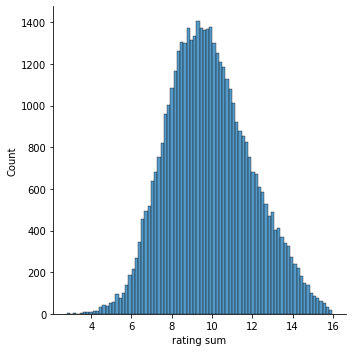

In [ ]:
sns.displot(detail_df['rating sum'])

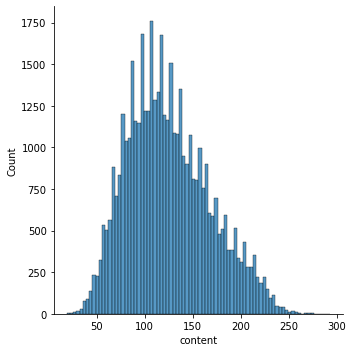

In [ ]:
sns.displot(detail_df['content'].apply(lambda z: len(z)))

In [ ]:
detail_df = detail_df.sample(frac=1)

In [ ]:
detail_df.columns

Index(['movie id', 'title', 'series', 'release year', 'certification',
       'duration', 'average rating', 'rating total', 'popularity score',
       'popularity delta', 'content', 'numOfUserReviews', 'numOfCriticReviews',
       'metaScore', 'star_url_list', 'countries_of_origin', 'official_sites',
       'languages', 'filming_locations', 'production_companies', 'budget_list',
       'year', 'num_of_countries', 'num_of_languages', 'rating sum'],
      dtype='object')

In [ ]:
serie = pd.get_dummies(detail_df['series'], drop_first=True)
serie.shape

(44954, 9)

In [ ]:
year = pd.get_dummies(detail_df['year'], drop_first=True)
year.shape

(44954, 7)

In [ ]:
MPPA = pd.get_dummies(detail_df['certification'], drop_first=True)
MPPA.shape

(44954, 13)

In [ ]:
# runtime = np.array(detail_df['movie runtime']).reshape(-1, 1)
# sns.displot(runtime)

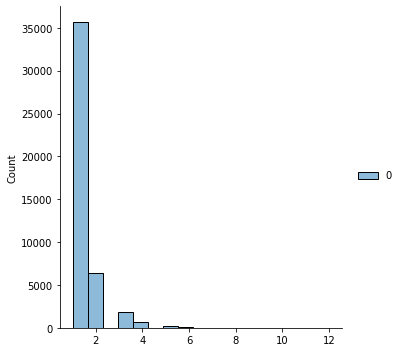

In [ ]:
no_countries = np.array(detail_df['num_of_countries']).reshape(-1, 1)
sns.displot(no_countries)

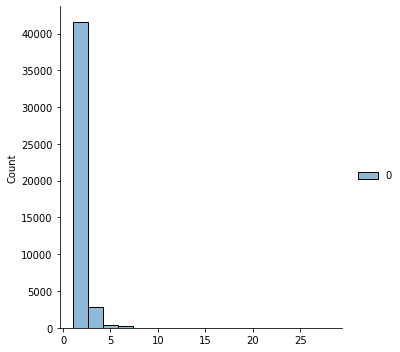

In [ ]:
no_langs = np.array(detail_df['num_of_languages']).reshape(-1, 1)
sns.displot(no_langs)

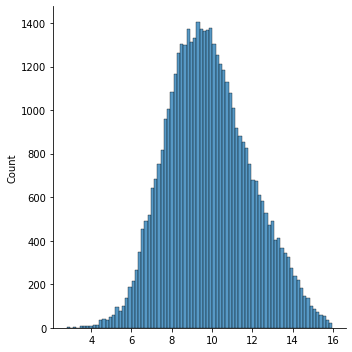

In [ ]:
y = np.array(detail_df['rating sum'])
sns.displot(y)

In [ ]:
%pip install cinemagoer
from imdb import Cinemagoer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 301 kB 15.1 MB/s 


In [ ]:
more_df = pd.DataFrame(columns=['movie id', 'genre', 'runtime'])
more_df = detail_df['movie id']

In [ ]:
# ia = Cinemagoer()
# genres = []
# runtimes = []

# for id in tqdm(detail_df['movie id']):
#   movie = ia.get_movie(id[2:])
#   genres.append(movie['genres'])
#   try:
#     runtimes.append(movie['runtime'][0])
#   except:
#     runtimes.append(None)

In [ ]:
vocab_size = 10000
embedding_dim = 64
max_length = 150

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(detail_df['content'])
sequences = tokenizer.texts_to_sequences(detail_df['content'])
padded_content_sequences = pad_sequences(sequences, maxlen=max_length, truncating='post', padding="post")
padded_content_sequences.shape

(44954, 150)

In [ ]:
print("serie shape:", serie.shape)
print("year shape:", year.shape)
print("MPPA shape:", MPPA.shape)
# print("runtime shape:", runtime.shape)
print("no_countries shape:", no_countries.shape)
print("no_langs shape:", no_langs.shape)

serie shape: (44954, 9)
year shape: (44954, 7)
MPPA shape: (44954, 13)
no_countries shape: (44954, 1)
no_langs shape: (44954, 1)


In [ ]:
class Metrics():


    @staticmethod
    def computeMSE(y_true, y_pred):
        return np.mean((y_true-y_pred)**2)

    @staticmethod
    def computeRMSE(y_true, y_pred):
        return np.sqrt(np.mean((y_true-y_pred)**2))

    @staticmethod
    def computeMAE(y_true, y_pred):
        return np.mean(np.abs(y_true-y_pred))

    @staticmethod
    def computeSIA(y_true, y_pred, eps=1): #soft interval accuracy
        error = np.abs(y_true - y_pred)
        cnt = 0
        for e in error:
          if e < eps:
            cnt += 1
        return cnt / len(y_true)



***Linear Regression***

In [ ]:
feature_list = [
                serie,
                year,
                MPPA,
                # runtime,
                no_countries,
                no_langs
]
X = np.hstack(feature_list)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_val = normalizer.transform(X_val)
X_test = normalizer.transform(X_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train ,y_train)

#Compute RMSE metrics
rmse_train = Metrics.computeRMSE(y_train, model.predict(X_train))
rmse_val = Metrics.computeRMSE(y_val, model.predict(X_val))
rmse_test = Metrics.computeRMSE(y_test, model.predict(X_test))

print("RMSE train:", rmse_train)
print("RMSE val:", rmse_val)
print("RMSE test:", rmse_test)
print()
print("--------")
print()
#Compute MAE metrics
mae_train = Metrics.computeMAE(y_train, model.predict(X_train))
mae_val = Metrics.computeMAE(y_val, model.predict(X_val))
mae_test = Metrics.computeMAE(y_test, model.predict(X_test))

print("MAE train:", mae_train)
print("MAE val:", mae_val)
print("MAE test:", mae_test)
print()
print("--------")
print()
#Compute SIA 1 metrics
sia_train = Metrics.computeSIA(y_train, model.predict(X_train))
sia_val = Metrics.computeSIA(y_val, model.predict(X_val))
sia_test = Metrics.computeSIA(y_test, model.predict(X_test))

print("SIA train:", sia_train)
print("SIA val:", sia_val)
print("SIA test:", sia_test)
print()
print("--------")
print()

(36412, 31) (36412,)
(4046, 31) (4046,)
(4496, 31) (4496,)
RMSE train: 1.8134746070209704
RMSE val: 1.8299568512464046
RMSE test: 1.8308218876561464

--------

MAE train: 1.4448317146860585
MAE val: 1.4573888674266682
MAE test: 1.4631693974370812

--------

SIA train: 0.42291002966055147
SIA val: 0.4157192288680178
SIA test: 0.41370106761565834

--------



***Ridge Regression***

In [ ]:
#Using L2 Regularization with Grid Search for tuning hyperparameter alpha
from sklearn.linear_model import Ridge

alphas = np.linspace(0.001, 10, num=100)
best_val = np.inf
best_alpha = -1
model = None
for alpha in alphas:
    tmp_model = Ridge(alpha)
    tmp_model.fit(X_train ,y_train)
    mae_val = Metrics.computeMAE(y_val, tmp_model.predict(X_val))
    if mae_val < best_val:
        best_val = mae_val
        model = tmp_model
        best_alpha = alpha

print("Best cross-validation MAE: {} with alpha: {}".format(best_val, best_alpha))

Best cross-validation MAE: 1.4573888858890807 with alpha: 0.001


In [ ]:

#Compute RMSE metrics
rmse_train = Metrics.computeRMSE(y_train, model.predict(X_train))
rmse_val = Metrics.computeRMSE(y_val, model.predict(X_val))
rmse_test = Metrics.computeRMSE(y_test, model.predict(X_test))

print("RMSE train:", rmse_train)
print("RMSE val:", rmse_val)
print("RMSE test:", rmse_test)
print()
print("--------")
print()
#Compute MAE metrics
mae_train = Metrics.computeMAE(y_train, model.predict(X_train))
mae_val = Metrics.computeMAE(y_val, model.predict(X_val))
mae_test = Metrics.computeMAE(y_test, model.predict(X_test))

print("MAE train:", mae_train)
print("MAE val:", mae_val)
print("MAE test:", mae_test)
print()
print("--------")
print()
#Compute SIA metrics
sia_train = Metrics.computeSIA(y_train, model.predict(X_train))
sia_val = Metrics.computeSIA(y_val, model.predict(X_val))
sia_test = Metrics.computeSIA(y_test, model.predict(X_test))

print("SIA train:", sia_train)
print("SIA val:", sia_val)
print("SIA test:", sia_test)
print()
print("--------")
print()

RMSE train: 1.8134746070210859
RMSE val: 1.829956860595737
RMSE test: 1.8308218922684

--------

MAE train: 1.444831716242767
MAE val: 1.4573888858890807
MAE test: 1.4631693985950405

--------

SIA train: 0.42291002966055147
SIA val: 0.4157192288680178
SIA test: 0.41370106761565834

--------



***Decision Tree - no content***

In [ ]:
feature_list = [
                serie,
                year,
                MPPA,
                # runtime,
                no_countries,
                no_langs
]
X = np.hstack(feature_list)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(36412, 31) (36412,)
(4046, 31) (4046,)
(4496, 31) (4496,)


In [ ]:
for n_estimators in tqdm([50, 100, 200, 500]):
  print("số lượng cây:", n_estimators)
  model = RandomForestRegressor(n_estimators = n_estimators)
  model = model.fit(X_train, y_train)
  #Compute RMSE metrics
  rmse_train = Metrics.computeRMSE(y_train, model.predict(X_train))
  rmse_val = Metrics.computeRMSE(y_val, model.predict(X_val))
  rmse_test = Metrics.computeRMSE(y_test, model.predict(X_test))

  print("RMSE train:", rmse_train)
  print("RMSE val:", rmse_val)
  print("RMSE test:", rmse_test)
  print()
  print("--------")
  print()
  #Compute MAE metrics
  mae_train = Metrics.computeMAE(y_train, model.predict(X_train))
  mae_val = Metrics.computeMAE(y_val, model.predict(X_val))
  mae_test = Metrics.computeMAE(y_test, model.predict(X_test))

  print("MAE train:", mae_train)
  print("MAE val:", mae_val)
  print("MAE test:", mae_test)
  print()
  print("--------")
  print()
  #Compute SIA metrics
  sia_train = Metrics.computeSIA(y_train, model.predict(X_train))
  sia_val = Metrics.computeSIA(y_val, model.predict(X_val))
  sia_test = Metrics.computeSIA(y_test, model.predict(X_test))

  print("SIA train:", sia_train)
  print("SIA val:", sia_val)
  print("SIA test:", sia_test)
  print()
  print("--------")
  print()

  0%|          | 0/4 [00:00<?, ?it/s]

số lượng cây: 50
RMSE train: 1.7040217088204546
RMSE val: 1.7742565700517778
RMSE test: 1.7785185585394911

--------

MAE train: 1.3348775775331623
MAE val: 1.405384630591383
MAE test: 1.4048329763934486

--------



 25%|██▌       | 1/4 [00:02<00:07,  2.61s/it]

SIA train: 0.46600021970778865
SIA val: 0.4416707859614434
SIA test: 0.4417259786476868

--------

số lượng cây: 100
RMSE train: 1.70385087562329
RMSE val: 1.7740290645900159
RMSE test: 1.7776562763829824

--------

MAE train: 1.3346097909558683
MAE val: 1.4048316443853013
MAE test: 1.403540958919935

--------



 50%|█████     | 2/4 [00:07<00:08,  4.16s/it]

SIA train: 0.46698890475667365
SIA val: 0.44315373208106773
SIA test: 0.4406138790035587

--------

số lượng cây: 200
RMSE train: 1.7036301515057373
RMSE val: 1.7740915859141804
RMSE test: 1.776665400485906

--------

MAE train: 1.3345635909259819
MAE val: 1.4045031446637575
MAE test: 1.4031960286509095

--------



 75%|███████▌  | 3/4 [00:18<00:07,  7.02s/it]

SIA train: 0.4672360760188949
SIA val: 0.44315373208106773
SIA test: 0.4401690391459075

--------

số lượng cây: 500
RMSE train: 1.7035371525376743
RMSE val: 1.7741804717070244
RMSE test: 1.7767138908111317

--------

MAE train: 1.3344626108296527
MAE val: 1.4048221009732202
MAE test: 1.4032452310886605

--------



100%|██████████| 4/4 [00:44<00:00, 11.09s/it]

SIA train: 0.46693397780951335
SIA val: 0.44191794364804743
SIA test: 0.4403914590747331

--------



In [ ]:
model = RandomForestRegressor()
model = model.fit(X_train, y_train)

In [ ]:
#Compute RMSE metrics
rmse_train = Metrics.computeRMSE(y_train, model.predict(X_train))
rmse_val = Metrics.computeRMSE(y_val, model.predict(X_val))
rmse_test = Metrics.computeRMSE(y_test, model.predict(X_test))

print("RMSE train:", rmse_train)
print("RMSE val:", rmse_val)
print("RMSE test:", rmse_test)
print()
print("--------")
print()
#Compute MAE metrics
mae_train = Metrics.computeMAE(y_train, model.predict(X_train))
mae_val = Metrics.computeMAE(y_val, model.predict(X_val))
mae_test = Metrics.computeMAE(y_test, model.predict(X_test))

print("MAE train:", mae_train)
print("MAE val:", mae_val)
print("MAE test:", mae_test)
print()
print("--------")
print()
#Compute SIA metrics
sia_train = Metrics.computeSIA(y_train, model.predict(X_train))
sia_val = Metrics.computeSIA(y_val, model.predict(X_val))
sia_test = Metrics.computeSIA(y_test, model.predict(X_test))

print("SIA train:", sia_train)
print("SIA val:", sia_val)
print("SIA test:", sia_test)
print()
print("--------")
print()

RMSE train: 1.7054230180288161
RMSE val: 1.7606565945726391
RMSE test: 1.7794077502112573

--------

MAE train: 1.3356325799956406
MAE val: 1.3887388796604943
MAE test: 1.4124717816100036

--------

SIA train: 0.46729100296605514
SIA val: 0.4401878398418191
SIA test: 0.429270462633452

--------



***Decision Tree - content***


In [ ]:
feature_list = [
                padded_content_sequences,
                serie,
                year,
                MPPA,
                # runtime,
                no_countries,
                no_langs
]
X = np.hstack(feature_list)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(36412, 181) (36412,)
(4046, 181) (4046,)
(4496, 181) (4496,)


In [ ]:
model = RandomForestRegressor(n_estimators=200)
model = model.fit(X_train, y_train)

In [ ]:
#Compute RMSE metrics
rmse_train = Metrics.computeRMSE(y_train, model.predict(X_train))
rmse_val = Metrics.computeRMSE(y_val, model.predict(X_val))
rmse_test = Metrics.computeRMSE(y_test, model.predict(X_test))

print("RMSE train:", rmse_train)
print("RMSE val:", rmse_val)
print("RMSE test:", rmse_test)
print()
print("--------")
print()
#Compute MAE metrics
mae_train = Metrics.computeMAE(y_train, model.predict(X_train))
mae_val = Metrics.computeMAE(y_val, model.predict(X_val))
mae_test = Metrics.computeMAE(y_test, model.predict(X_test))

print("MAE train:", mae_train)
print("MAE val:", mae_val)
print("MAE test:", mae_test)
print()
print("--------")
print()
#Compute SIA metrics
sia_train = Metrics.computeSIA(y_train, model.predict(X_train))
sia_val = Metrics.computeSIA(y_val, model.predict(X_val))
sia_test = Metrics.computeSIA(y_test, model.predict(X_test))

print("SIA train:", sia_train)
print("SIA val:", sia_val)
print("SIA test:", sia_test)
print()
print("--------")
print()

RMSE train: 0.6001709800298455
RMSE val: 1.5801739057122497
RMSE test: 1.6321981524532816

--------

MAE train: 0.45634370587382683
MAE val: 1.2057236279520358
MAE test: 1.2537485542597606

--------

SIA train: 0.8977260243875645
SIA val: 0.532377656945131
SIA test: 0.5084519572953736

--------



***Neural network***

In [ ]:
feature_list = [
                padded_content_sequences,
                serie,
                year,
                MPPA,
                # runtime,
                no_countries,
                no_langs
]
X = np.hstack(feature_list)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(36412, 181) (36412,)
(4046, 181) (4046,)
(4496, 181) (4496,)


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten, Dense, Input, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.keras.backend as K

In [ ]:
class Metrics():


    @staticmethod
    def computeMSE(y_true, y_pred):
      
        c = 0
        for i in range(len(y_true)):
          c += (y_true[i] - y_pred[i][0]) ** 2
        return c / len(y_true)

    @staticmethod
    def computeRMSE(y_true, y_pred):
        c = 0
        for i in range(len(y_true)):
          c += (y_true[i] - y_pred[i][0]) ** 2
        return np.sqrt(c / len(y_true))

    @staticmethod
    def computeMAE(y_true, y_pred):
        c = 0
        for i in range(len(y_true)):
          c += np.abs(y_true[i] - y_pred[i][0])
        return c / len(y_true)

    @staticmethod
    def computeSIA(y_true, y_pred, eps=1): #soft interval accuracy
        cnt = 0
        for i in range(len(y_true)):
          c = np.abs(y_true[i] - y_pred[i][0])
          if c < eps:
            cnt += 1
        return cnt / len(y_true)



In [ ]:
model = Sequential([
    Dense(units=64,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=256,activation='relu'),
    Dense(units=512, activation ='relu'),
    Dense(units=128, activation ='relu'),
    Dense(units=64, activation ='relu'),
    Dense(units=1, activation='relu')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.01),
              loss = losses.mean_absolute_error,
              metrics=['mae'])

   

In [ ]:
if not os.path.exists("models"):
    os.makedirs("models")
mcp_save = ModelCheckpoint(
    filepath="models/nn_model.h5",
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)  #save model's weights with highest validation performance

model.fit(X_train, y_train,
          epochs=300,
          batch_size=100,
          validation_data=(X_val, y_val),
          callbacks=[mcp_save])

Epoch 1/300
365/365 [==============================] - 3s 7ms/step - loss: 9.8681 - mae: 9.8681 - val_loss: 9.8486 - val_mae: 9.8486
Epoch 2/300
365/365 [==============================] - 2s 6ms/step - loss: 9.8681 - mae: 9.8681 - val_loss: 9.8486 - val_mae: 9.8486
Epoch 3/300
365/365 [==============================] - 2s 4ms/step - loss: 9.8681 - mae: 9.8681 - val_loss: 9.8486 - val_mae: 9.8486
Epoch 4/300
365/365 [==============================] - 1s 3ms/step - loss: 9.8681 - mae: 9.8681 - val_loss: 9.8486 - val_mae: 9.8486
Epoch 5/300
365/365 [==============================] - 1s 3ms/step - loss: 9.8681 - mae: 9.8681 - val_loss: 9.8486 - val_mae: 9.8486
Epoch 6/300
365/365 [==============================] - 1s 3ms/step - loss: 9.8681 - mae: 9.8681 - val_loss: 9.8486 - val_mae: 9.8486
Epoch 7/300
365/365 [==============================] - 1s 3ms/step - loss: 9.8681 - mae: 9.8681 - val_loss: 9.8486 - val_mae: 9.8486
Epoch 8/300
365/365 [==============================] - 1s 3ms/step - 

KeyboardInterrupt: ignored

In [ ]:
class Metrics():


    @staticmethod
    def computeMSE(y_true, y_pred):
      
        c = 0
        for i in range(len(y_true)):
          c += (y_true[i] - y_pred[i][0]) ** 2
        return c / len(y_true)

    @staticmethod
    def computeRMSE(y_true, y_pred):
        c = 0
        for i in range(len(y_true)):
          c += (y_true[i] - y_pred[i][0]) ** 2
        return np.sqrt(c / len(y_true))

    @staticmethod
    def computeMAE(y_true, y_pred):
        c = 0
        for i in range(len(y_true)):
          c += np.abs(y_true[i] - y_pred[i][0])
        return c / len(y_true)

    @staticmethod
    def computeSIA(y_true, y_pred, eps=1): #soft interval accuracy
        cnt = 0
        for i in range(len(y_true)):
          c = np.abs(y_true[i] - y_pred[i][0])
          if c < eps:
            cnt += 1
        return cnt / len(y_true)



In [ ]:
#Compute RMSE metrics
rmse_train = Metrics.computeRMSE(y_train, model.predict(X_train))
rmse_val = Metrics.computeRMSE(y_val, model.predict(X_val))
rmse_test = Metrics.computeRMSE(y_test, model.predict(X_test))

print("RMSE train:", rmse_train)
print("RMSE val:", rmse_val)
print("RMSE test:", rmse_test)
print()
print("--------")
print()
#Compute MAE metrics
mae_train = Metrics.computeMAE(y_train, model.predict(X_train))
mae_val = Metrics.computeMAE(y_val, model.predict(X_val))
mae_test = Metrics.computeMAE(y_test, model.predict(X_test))

print("MAE train:", mae_train)
print("MAE val:", mae_val)
print("MAE test:", mae_test)
print()
print("--------")
print()
#Compute SIA metrics
sia_train = Metrics.computeSIA(y_train, model.predict(X_train))
sia_val = Metrics.computeSIA(y_val, model.predict(X_val))
sia_test = Metrics.computeSIA(y_test, model.predict(X_test))

print("SIA train:", sia_train)
print("SIA val:", sia_val)
print("SIA test:", sia_test)
print()
print("--------")
print()

RMSE train: 10.07691973112832
RMSE val: 10.055951511440442
RMSE test: 10.10920693174914

--------

MAE train: 9.859992945709358
MAE val: 9.84059897224929
MAE test: 9.896247789675208

--------

SIA train: 0.0
SIA val: 0.0
SIA test: 0.0

--------



In [ ]:
side_information_list = [
                serie,
                year,
                MPPA,
                # runtime,
                no_countries,
                no_langs
]

side_information_vector = np.hstack(side_information_list)

In [ ]:
side_information_vector.shape

(44954, 31)

In [ ]:
side_information_train = side_information_vector[:int(side_information_vector.shape[0] * 0.9)]
padded_content_sequences_train = padded_content_sequences[:int(side_information_vector.shape[0] * 0.9)]

# side_information_val = side_information_train[int(side_information_train.shape[0] * 0.9):]
# padded_content_sequences_val = padded_content_sequences_train[int(padded_content_sequences_train.shape[0] * 0.9):]

# side_information_train = side_information_train[:int(side_information_train.shape[0] * 0.9)]
# padded_content_sequences_train = padded_content_sequences_train[:int(padded_content_sequences_train.shape[0] * 0.9)]

side_information_test = side_information_vector[int(side_information_vector.shape[0] * 0.9):]
padded_content_sequences_test = padded_content_sequences[int(side_information_vector.shape[0] * 0.9):]

y_train = y[:int(side_information_vector.shape[0] * 0.9)]
# y_val = y_train[int(y_train.shape[0] * 0.9):]
# y_train = y_train[:int(y_train.shape[0] * 0.9)]
y_test = y[int(side_information_vector.shape[0] * 0.9):]

In [ ]:
print(side_information_train.shape, padded_content_sequences_train.shape, y_train.shape)
# print(side_information_val.shape, padded_content_sequences_val.shape, y_val.shape)
print(side_information_test.shape, padded_content_sequences_test.shape, y_test.shape)

(40458, 31) (40458, 150) (40458,)
(4496, 31) (4496, 150) (4496,)


In [ ]:
vocab_size = 10000
embedding_dim = 64
max_length = 150
side_information_length = side_information_vector.shape[1]

In [ ]:
def build_model():
    content_input = Input(shape=(max_length, ), name='content_input')
    side_information_input = Input(shape=(side_information_length), name='side_information_input')

    content_Embedding = Embedding(vocab_size, embedding_dim, input_length = max_length)

    content_latent = Flatten()(content_Embedding(content_input))
    content_latent = Dense(90, activation='relu')(content_latent)

    all_input = Concatenate()([content_latent, side_information_input])

    dense_256 = Dense(256, activation='relu')(all_input)
    dense_512 = Dense(512, activation='relu')(dense_256)
    # dense_512 = Dropout(0.3)(dense_512)
    dense_256 = Dense(128, activation='relu')(dense_512)
    # dense_256 = Dropout(0.3)(dense_256)
    

    dense_128 = Dense(128, activation='relu')(dense_256)
    dense_64 = Dense(64, activation ='relu')(dense_128)
    prediction = Dense(1, kernel_initializer='glorot_uniform', name='prediction')(dense_64)

    model = Model([content_input, side_information_input], prediction)

    return model

def train_model(model, learner, batch_size, epochs, val_split, inputs, outputs):
   
   
    model.compile(loss = losses.mean_absolute_error, optimizer=learner, metrics=['mae'])
    
   
    early_stopper = EarlyStopping(monitor='val_mae', patience=10, verbose=1)
    if not os.path.exists('./models'):
      os.makedirs('./models')
    model_saver = ModelCheckpoint(filepath='./models/MIBPS_model.hdf5',
                                  monitor='val_mae',
                                  save_best_only=True,
                                  save_weights_only=True)
   
    history = model.fit(inputs, outputs,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_split=val_split,
                        callbacks=[early_stopper, model_saver])
    return history


def load_trained_model(model, weights_path):
    model.load_weights(weights_path)
    return model

In [ ]:
model = build_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 content_input (InputLayer)     [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 150, 64)      640000      ['content_input[0][0]']          
                                                                                                  
 flatten (Flatten)              (None, 9600)         0           ['embedding[0][0]']              
                                                                                                  
 dense_24 (Dense)               (None, 90)           864090      ['flatten[0][0]']                
                                                                                              

In [ ]:
learning_rate = 0.001
training_epochs = 300
batch_size = 256
sgd = optimizers.SGD(learning_rate=learning_rate)
val_split = 0.1
# val_data = [[padded_content_sequences_val, side_information_val], y_val]

In [ ]:
history = train_model(model, sgd, batch_size, training_epochs, val_split, [padded_content_sequences_train, side_information_train], y_train)

Epoch 1/300
143/143 [==============================] - 3s 16ms/step - loss: 9.6454 - mae: 9.6454 - val_loss: 9.4353 - val_mae: 9.4353
Epoch 2/300
143/143 [==============================] - 1s 5ms/step - loss: 8.9579 - mae: 8.9579 - val_loss: 8.3481 - val_mae: 8.3481
Epoch 3/300
143/143 [==============================] - 1s 5ms/step - loss: 5.2399 - mae: 5.2399 - val_loss: 1.8389 - val_mae: 1.8389
Epoch 4/300
143/143 [==============================] - 1s 9ms/step - loss: 1.7581 - mae: 1.7581 - val_loss: 1.7123 - val_mae: 1.7123
Epoch 5/300
143/143 [==============================] - 1s 5ms/step - loss: 1.6526 - mae: 1.6526 - val_loss: 1.6327 - val_mae: 1.6327
Epoch 6/300
143/143 [==============================] - 1s 5ms/step - loss: 1.5859 - mae: 1.5859 - val_loss: 1.5799 - val_mae: 1.5799
Epoch 7/300
143/143 [==============================] - 1s 5ms/step - loss: 1.5439 - mae: 1.5439 - val_loss: 1.5473 - val_mae: 1.5473
Epoch 8/300
143/143 [==============================] - 1s 5ms/step -

In [ ]:
#Compute RMSE metrics
rmse_train = Metrics.computeRMSE(y_train, model.predict([padded_content_sequences_train, side_information_train]))
rmse_test = Metrics.computeRMSE(y_test, model.predict([padded_content_sequences_test, side_information_test]))

print("RMSE train:", rmse_train)
print("RMSE test:", rmse_test)
print()
print("--------")
print()
#Compute MAE metrics
mae_train = Metrics.computeMAE(y_train, model.predict([padded_content_sequences_train, side_information_train]))
mae_test = Metrics.computeMAE(y_test, model.predict([padded_content_sequences_test, side_information_test]))

print("MAE train:", mae_train)
# print("MAE val:", mae_val)
print("MAE test:", mae_test)
print()
print("--------")
print()
#Compute SIA metrics
sia_train = Metrics.computeSIA(y_train, model.predict([padded_content_sequences_train, side_information_train]))
sia_test = Metrics.computeSIA(y_test, model.predict([padded_content_sequences_test, side_information_test]))

print("SIA train:", sia_train)
# print("SIA val:", sia_val)
print("SIA test:", sia_test)
print()
print("--------")
print()

RMSE train: 1.733010040093652
RMSE test: 1.7111183587128649

--------

MAE train: 1.366301391820987
MAE test: 1.3542741615592366

--------

SIA train: 0.4475505462454891
SIA test: 0.451067615658363

--------



In [ ]:
# RMSE train: 0.6019388917429738
# RMSE val: 1.5845900268450415
# RMSE test: 1.6032639249225282

# --------

# MAE train: 0.4622568914429894
# MAE val: 1.2302190576934184
# MAE test: 1.2366837939664836

# --------

# SIA train: 0.8991791853802076
# SIA val: 0.5009291761304976
# SIA test: 0.5064420218037661